In [23]:
#0 Import the data and declare your package dependencies.
import numpy as np
import pandas as pd

df_avocado = pd.read_csv('/content/avocado-updated-2020.csv')

In [24]:
#1 Briefly describe the data set. What information does it contain?
df_avocado.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


In [25]:
#2 Clean the data in any way you see fit.
avocado_clean = df_avocado.dropna()

data_types = df_avocado.dtypes
data_types

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

In [26]:
#3 Which major geographical region sold the most total organic, small Hass avocados in 2017?
unique_geographies = avocado_clean['geography'].unique()
unique_geographies

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [27]:
region_mapping = {
    'Far West': ['California', 'Las Vegas', 'Los Angeles', 'Portland', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 'Spokane', 'West'],
    'Great Lakes': ['Chicago', 'Cincinnati/Dayton', 'Columbus', 'Detroit', 'Grand Rapids', 'Indianapolis'],
    'Mideast': ['Albany', 'Baltimore/Washington', 'Buffalo/Rochester', 'Harrisburg/Scranton', 'New York', 'Philadelphia', 'Pittsburgh', 'Syracuse'],
    'Midsouth': ['Midsouth'],
    'New England': ['Boston', 'Hartford/Springfield', 'Northern New England'],
    'Northeast': ['Northeast'],
    'Plains': ['Plains', 'St.Louis'],
    'Rocky Mountain': ['Boise', 'Denver'],
    'South Central': ['South Central'],
    'Southeast': ['Atlanta', 'Charlotte', 'Jacksonville', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville', 'Orlando', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Tampa'],
    'Southwest': ['Dallas/Ft. Worth', 'Houston', 'Phoenix/Tucson', 'West Tex/New Mexico'],
    'Total U.S.': ['Total U.S.']
}

reversed_mapping = {city: region for region, cities in region_mapping.items() for city in cities}

avocado_clean["region"] = avocado_clean["geography"].map(reversed_mapping)

avocado_clean.head()


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Mideast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Mideast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Southeast
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Southeast
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Mideast


In [28]:
avocado_clean["region"] = avocado_clean["region"].astype('category')
avocado_clean.dtypes

date               object
average_price     float64
total_volume      float64
4046              float64
4225              float64
4770              float64
total_bags        float64
small_bags        float64
large_bags        float64
xlarge_bags       float64
type               object
year                int64
geography          object
region           category
dtype: object

In [29]:
filtered_data = avocado_clean[(avocado_clean['year'] == 2017) & (avocado_clean['type'] == 'organic')]
grouped_data = filtered_data.groupby('region')['4046'].sum()

max_sales_region = grouped_data.idxmax()
max_sales_value = grouped_data.max()

max_sales_region, max_sales_value

('Total U.S.', 6882024.42)

In [30]:
#4 Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?
# convert the date column into a datetime object
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

# extract the day, month, and year components
avocado_clean['day'] = avocado_clean['date'].dt.day
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['year'] = avocado_clean['date'].dt.year

# show the modified data frame
avocado_clean.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,day,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Mideast,4,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Mideast,4,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Southeast,4,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Southeast,4,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Mideast,4,1


In [31]:
#Find the month that has the highest average volume of avocado sales
average_monthly_sales = avocado_clean.groupby(by=["month","year"])['total_volume'].mean()

max_sales_month_year = average_monthly_sales.idxmax()
max_sales_value_month = average_monthly_sales.max()

max_sales_month_year, max_sales_value_month

((5, 2020), 1458037.5165185183)

In [32]:
#5 Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.
avocado_group = avocado_clean[['total_volume', 'region']].groupby("region").sum()

avocado_sort = avocado_group.sort_values(by = 'total_volume', ascending=False)
avocado_sort

,total_volume
region,
Total U.S.,1.209377e+10
Far West,6.254118e+09
South Central,2.075908e+09
Northeast,1.541420e+09
Southwest,1.520183e+09
Southeast,1.225510e+09
Mideast,1.208661e+09
Midsouth,1.097477e+09
Great Lakes,6.817330e+08


In [33]:
top_5_region = avocado_sort.head(6).drop('Total U.S.')

top_5_region_noindex = top_5_region.reset_index()
top_5_region_noindex

,region,total_volume
0,Far West,6.254118e+09
1,South Central,2.075908e+09
2,Northeast,1.541420e+09
3,Southwest,1.520183e+09
4,Southeast,1.225510e+09


In [34]:
plot_data = avocado_clean[avocado_clean["region"].isin(["Far West", "South Central", "Northeast", "Southwest", "Southeast"])]

plot_data.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,day,month
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Southeast,4,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Southeast,4,1
12,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.8,conventional,2015,California,Far West,4,1
13,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California,Far West,4,1
14,2015-01-04,1.19,166006.29,29419.03,47220.75,38568.95,50797.56,44329.03,6468.53,0.0,conventional,2015,Charlotte,Southeast,4,1


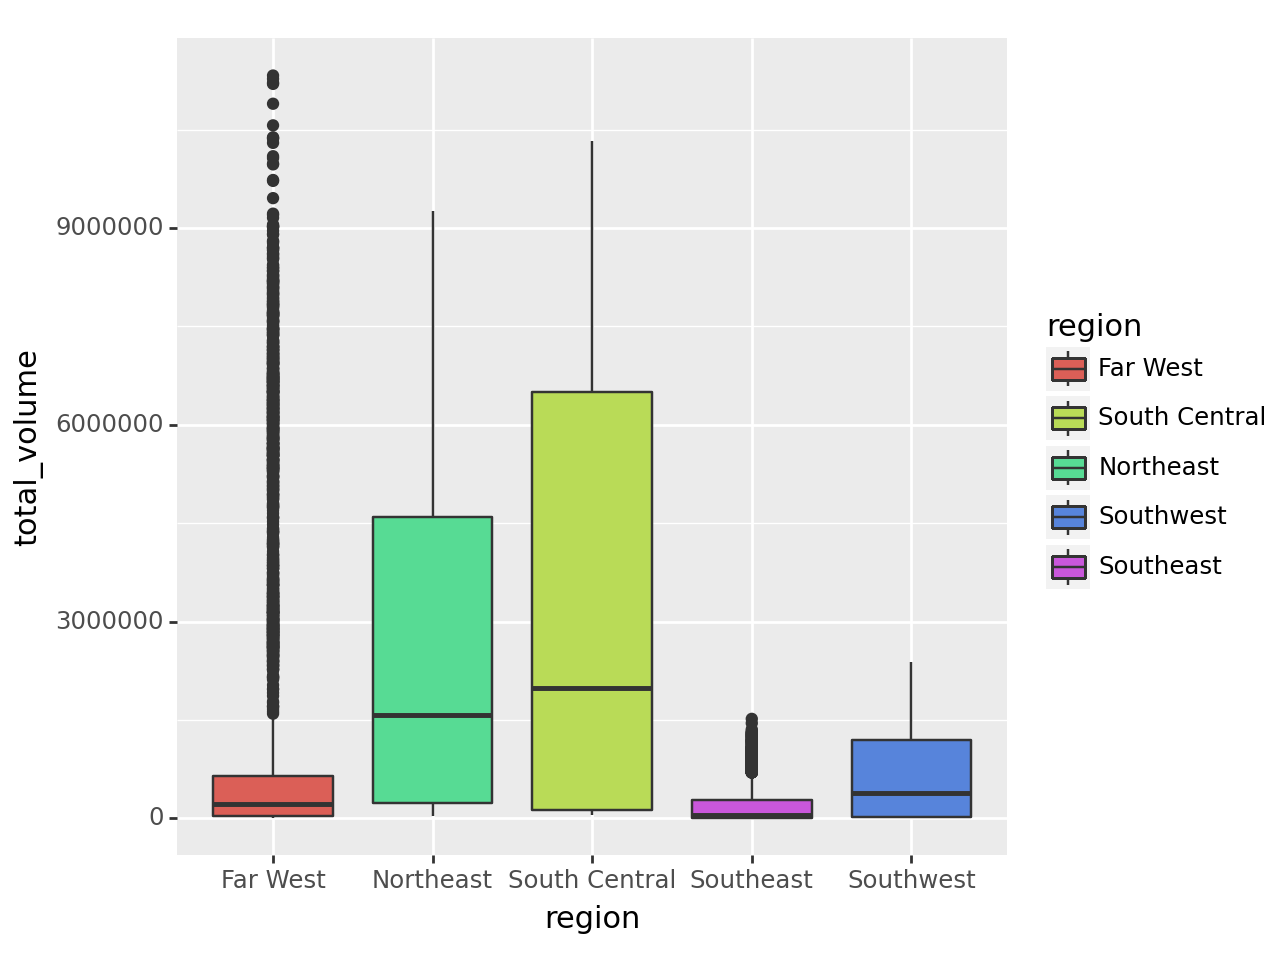

<Figure Size: (640 x 480)>

In [35]:
from plotnine import ggplot, aes, geom_boxplot, scale_fill_discrete

plot = (ggplot(plot_data, aes(x="region", y="total_volume", fill="region"))
        + geom_boxplot()
        + scale_fill_discrete(limits=['Far West', 'South Central', 'Northeast', 'Southwest', 'Southeast'])
)

plot

In [36]:
#6 From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.
#Create a dataset only include "Los Angeles", "San Diego", "Sacramento", and "San Francisco"
avocado_ca = avocado_clean[avocado_clean["geography"].isin(["Los Angeles", "San Diego", "Sacramento", "San Francisco"])]
avocado_ca.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,day,month
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Far West,4,1
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Far West,4,1
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,Far West,4,1
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,Far West,4,1
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,Far West,4,1


In [37]:
#7 In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.
grouped_data = avocado_ca.groupby(['geography', 'type'])['average_price'].mean().unstack()
grouped_data['price_difference'] = grouped_data['organic'] - grouped_data['conventional']
sorted_difference = grouped_data['price_difference'].sort_values(ascending=False)
sorted_difference

geography
San Francisco    0.718954
San Diego        0.684510
Sacramento       0.578497
Los Angeles      0.527778
Name: price_difference, dtype: float64

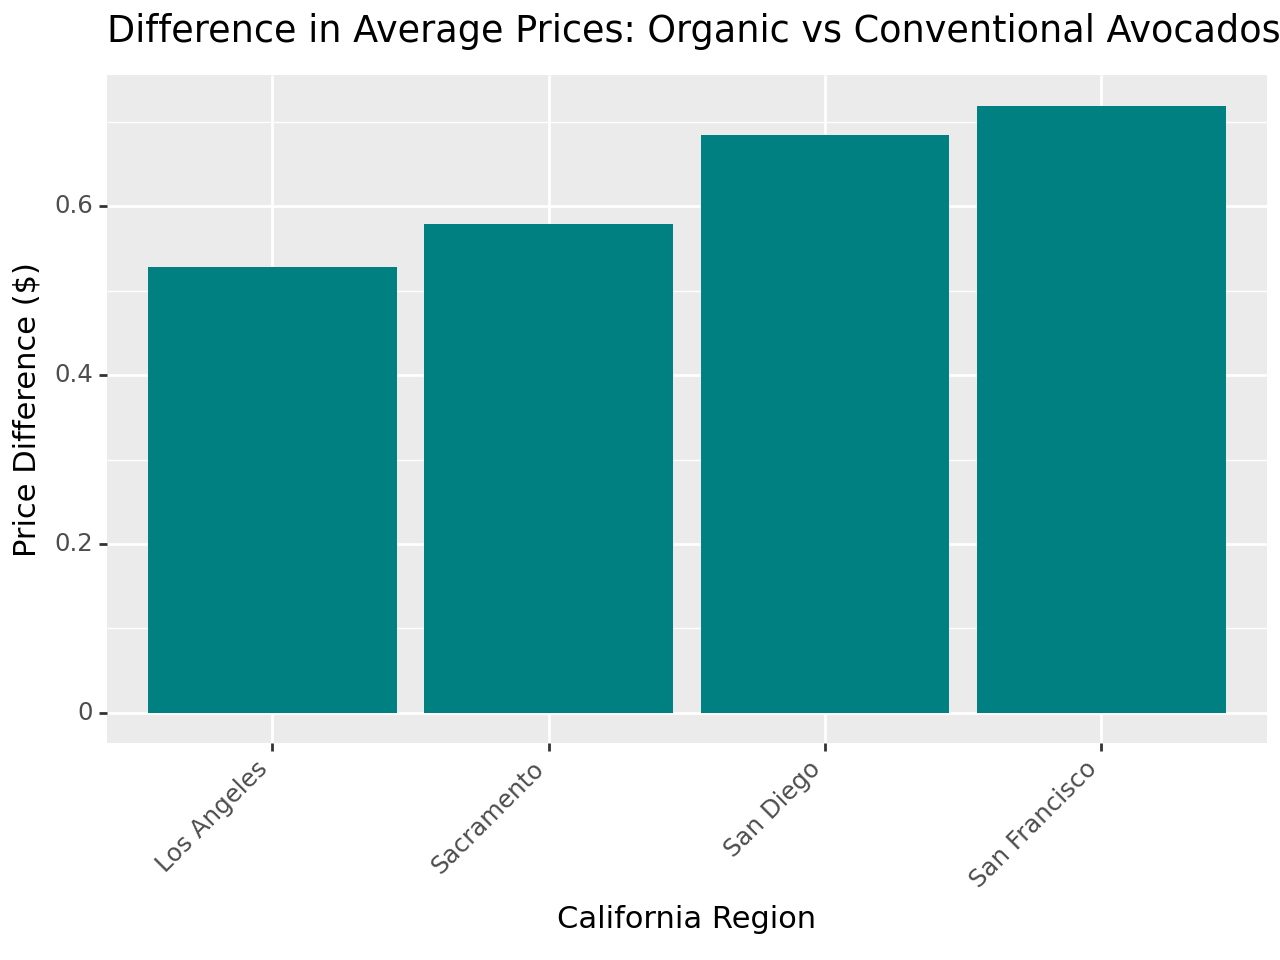

<Figure Size: (640 x 480)>

In [38]:
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text

# Create the bar plot using plotnine
plot = (
    ggplot(sorted_difference.reset_index(), aes(x='geography', y='price_difference')) +
    geom_bar(stat='identity', fill='teal') +
    labs(title='Difference in Average Prices: Organic vs Conventional Avocados',
         y='Price Difference ($)', x='California Region') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

plot

In [39]:
#8 The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.
long_avocado = avocado_ca.melt(id_vars=['date', 'type', 'geography', 'year', 'average_price'],
                                 value_vars=['4046', '4225', '4770'],
                                 var_name='size', value_name='volume')
long_avocado

,date,type,geography,year,average_price,size,volume
0,2015-01-04,conventional,Los Angeles,2015,0.85,4046,1837999.65
1,2015-01-04,organic,Los Angeles,2015,1.25,4046,47721.51
2,2015-01-04,conventional,Sacramento,2015,1.05,4046,110693.69
3,2015-01-04,organic,Sacramento,2015,1.33,4046,3727.52
4,2015-01-04,conventional,San Diego,2015,0.94,4046,244152.26
...,...,...,...,...,...,...,...
7339,2020-11-29,organic,Sacramento,2020,1.43,4770,0.00
7340,2020-11-29,conventional,San Diego,2020,1.12,4770,7210.47
7341,2020-11-29,organic,San Diego,2020,1.95,4770,0.00
7342,2020-11-29,conventional,San Francisco,2020,1.50,4770,5597.21


In [40]:
grouped_avocado_ca = long_avocado.groupby(['geography', 'type', 'size'])['volume'].sum().reset_index()

total_volume_by_type = grouped_avocado_ca.groupby(['geography', 'type'])['volume'].sum().reset_index()
total_volume_by_type = total_volume_by_type.rename(columns={"volume": "total_volume"})

proportion_data = pd.merge(grouped_avocado_ca, total_volume_by_type, on=['geography', 'type'])

proportion_data['proportion'] = proportion_data['volume'] / proportion_data['total_volume']

proportion_data

,geography,type,size,volume,total_volume,proportion
0,Los Angeles,conventional,4046,3.589234e+08,5.244437e+08,0.684389
1,Los Angeles,conventional,4225,1.358157e+08,5.244437e+08,0.258971
2,Los Angeles,conventional,4770,2.970453e+07,5.244437e+08,0.056640
3,Los Angeles,organic,4046,4.419272e+06,1.078721e+07,0.409677
4,Los Angeles,organic,4225,6.366092e+06,1.078721e+07,0.590152
5,Los Angeles,organic,4770,1.846800e+03,1.078721e+07,0.000171
6,Sacramento,conventional,4046,4.323263e+07,1.195302e+08,0.361688
7,Sacramento,conventional,4225,7.435955e+07,1.195302e+08,0.622099
8,Sacramento,conventional,4770,1.937984e+06,1.195302e+08,0.016213
9,Sacramento,organic,4046,8.595212e+05,2.170262e+06,0.396045


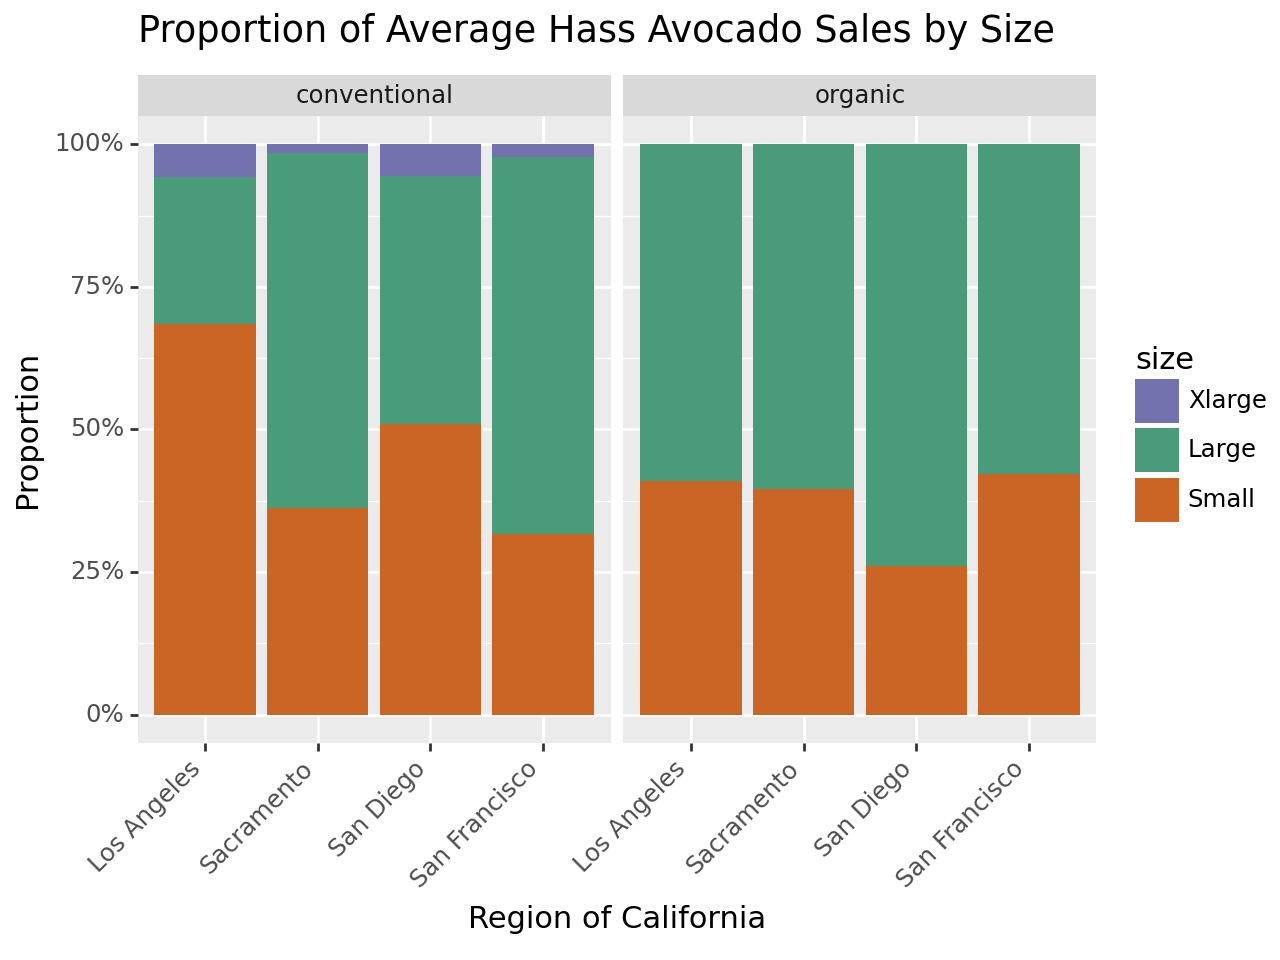

<Figure Size: (640 x 480)>

In [41]:
proportion_data['size'] = pd.Categorical(proportion_data['size'],
                                         categories=['4770', '4225', '4046'],
                                         ordered=True)

from plotnine import facet_wrap, scale_y_continuous, scale_fill_manual
(ggplot(proportion_data,
aes(
  x = "geography",
  fill = "size"
))
+ geom_bar(stat="identity", position="stack")
+ facet_wrap("type")
+ aes(y="proportion")
+ scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
+ labs(title='Proportion of Average Hass Avocado Sales by Size',
         y='Proportion', x='Region of California')
+ theme(axis_text_x=element_text(rotation=45, hjust=1))
+ scale_fill_manual(values=('#7371ae','#4a9b7a', '#cb6526'), labels=['Xlarge', 'Large', 'Small'])
)

In [42]:
#Using Outside Data
import numpy as np
import pandas as pd

df_avocado = pd.read_csv('/content/avocado-updated-2020.csv')
df_house = pd.read_csv('/content/house_prices_2015_2020.csv')

avocado_inner = pd.merge(df_avocado, df_house, on=["year", "geography"], how="inner")
avocado_inner_ca = avocado_inner[avocado_inner["geography"].isin(["Los Angeles", "San Diego", "Sacramento", "San Francisco"])]
avocado_inner_ca.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,house_price
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,752
1,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,752
2,2015-01-11,0.85,2713699.60,1786326.65,617233.39,58892.91,251246.65,222971.68,25111.74,3163.23,conventional,2015,Los Angeles,752
3,2015-01-11,1.08,60232.63,52087.31,2063.44,0.00,6081.88,6081.88,0.00,0.00,organic,2015,Los Angeles,752
4,2015-01-18,0.89,2800679.50,1925013.31,526106.80,59364.23,290195.16,260857.96,26671.18,2666.02,conventional,2015,Los Angeles,752


In [43]:
correlation = avocado_inner_ca[["average_price", "house_price"]].corr()

correlation_value = correlation.iloc[0, 1]
correlation_value

0.1592782016492195

The correlation coefficient between the average avocado price and the house price is around 0.159. There is a slight tendency for avocado price increases and the house price increases as well.

In [44]:
grouped_avocado_house = avocado_inner_ca.groupby(["year", "geography"]).agg({
    "average_price": "mean",
    "house_price": "mean"
}).reset_index()

grouped_avocado_house.head()

,year,geography,average_price,house_price
0,2015,Los Angeles,1.152500,752.0
1,2015,Sacramento,1.454038,414.0
2,2015,San Diego,1.274231,692.0
3,2015,San Francisco,1.621058,956.0
4,2016,Los Angeles,1.083750,736.0


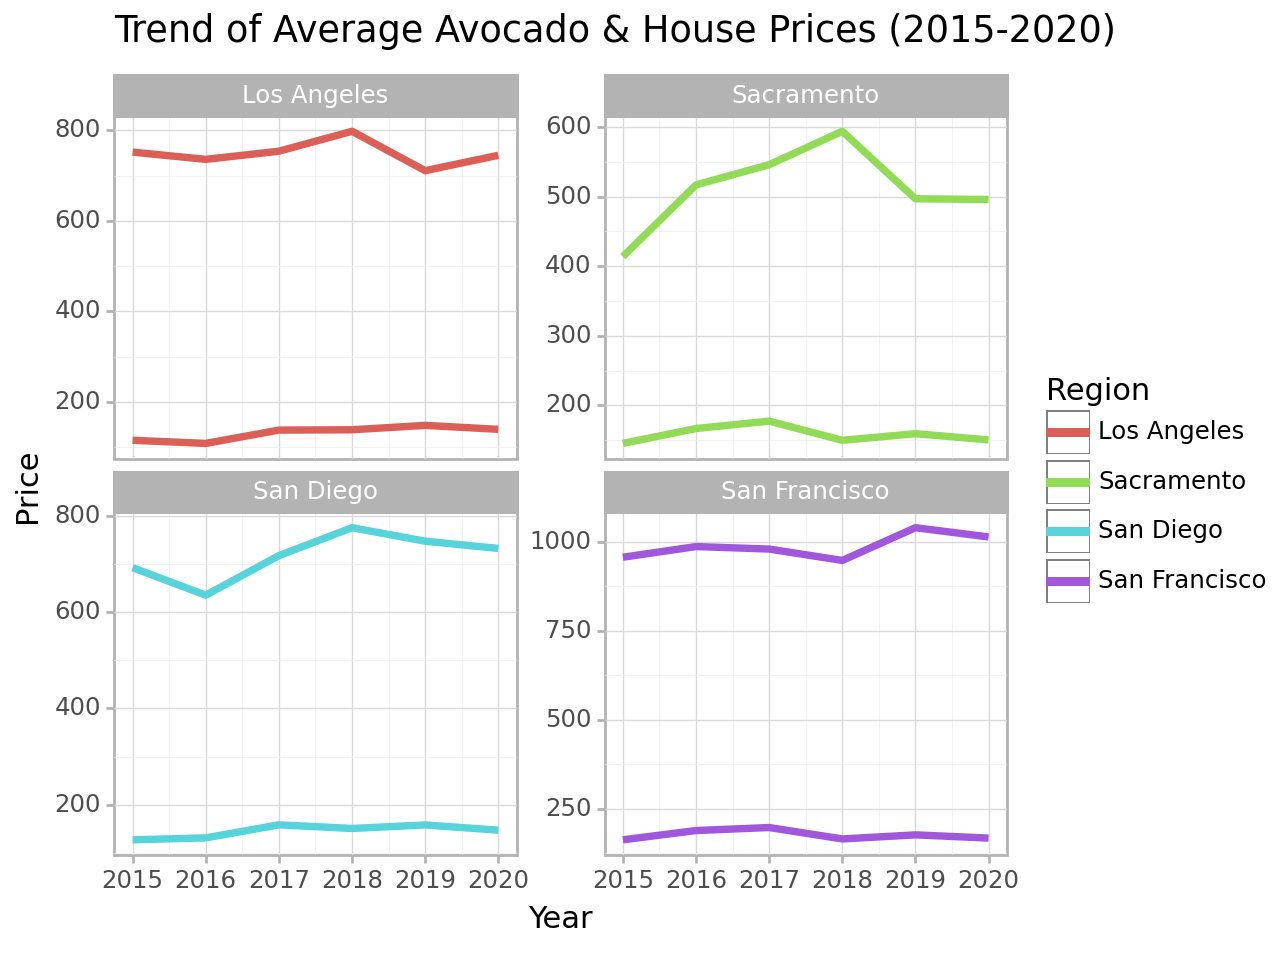

<Figure Size: (640 x 480)>

In [45]:
from plotnine import ggplot, aes, geom_line, facet_wrap, labs, theme_light

(ggplot(grouped_avocado_house, aes(x="year", group="geography", color="geography")) +
    geom_line(aes(y="average_price * 100"), size=1.5) +
    geom_line(aes(y="house_price"), size=1.5) +
    labs(title="Trend of Average Avocado & House Prices (2015-2020)",
         x="Year", y="Price",
         color="Region", linetype="Metric") +
    theme_light() +
    facet_wrap("~ geography", scales="free_y")
)

The top line is the house price and the bottom line is the avocado price*100